# Let's Grow More  (LGMVIP) - "DATA SCIENCE INTERN" 


*### BEGINNER LEVEL TASK*

### TASK-1- Iris Flowers Classification ML Project :


#### Dataset link : http://archive.ics.uci.edu/ml/machine-learning-databases/iris

##### Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [43]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])

In [44]:
df

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
df.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [46]:
df.shape

(150, 5)

In [47]:
df.columns

Index(['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm',
       'Petal_Width_in_cm', 'Species_Flower'],
      dtype='object')

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species_Flower      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.isnull().sum()

Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species_Flower        0
dtype: int64

In [50]:
df['Species_Flower'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
df.describe()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualisation

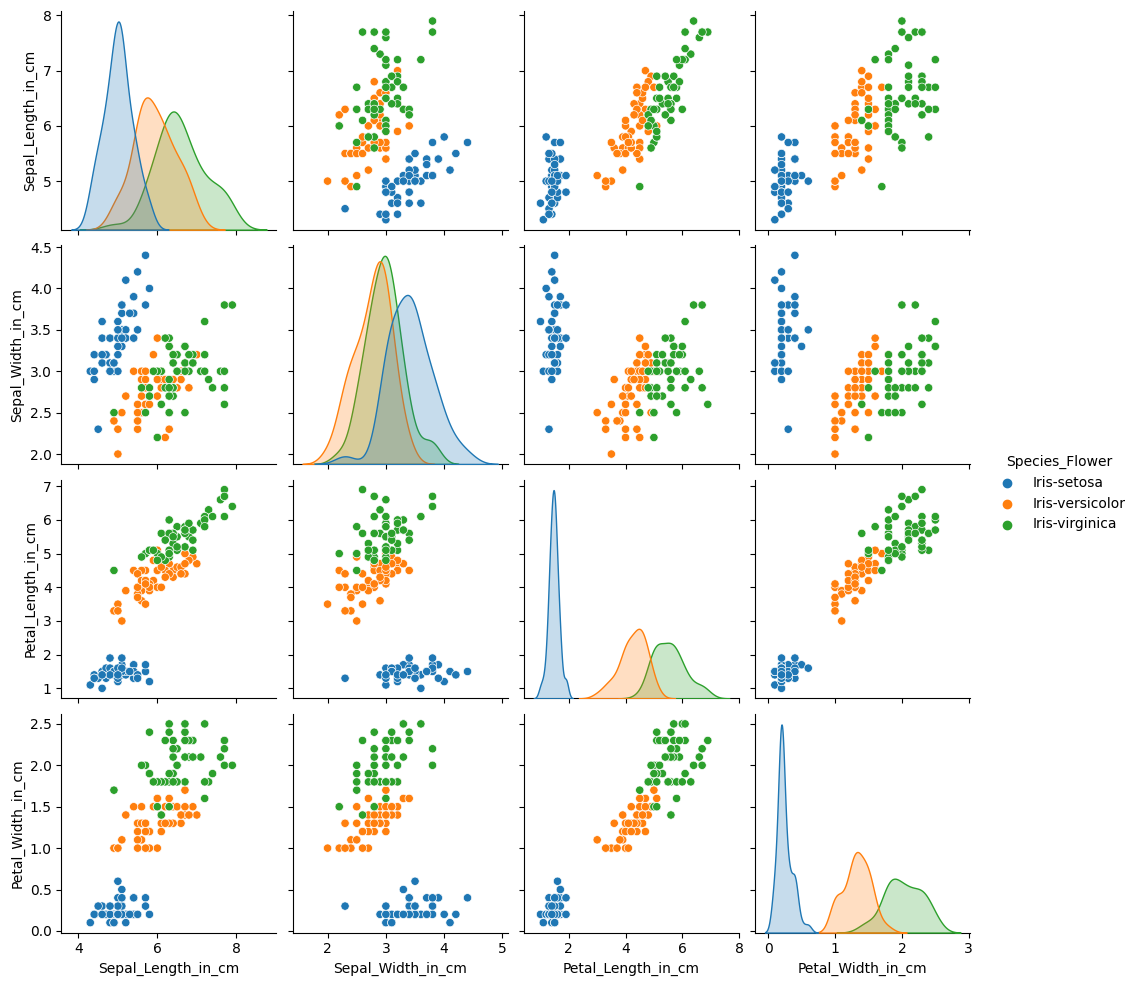

In [52]:
sns.pairplot(df,hue="Species_Flower")

<Axes: xlabel='Sepal_Width_in_cm', ylabel='Petal_Width_in_cm'>

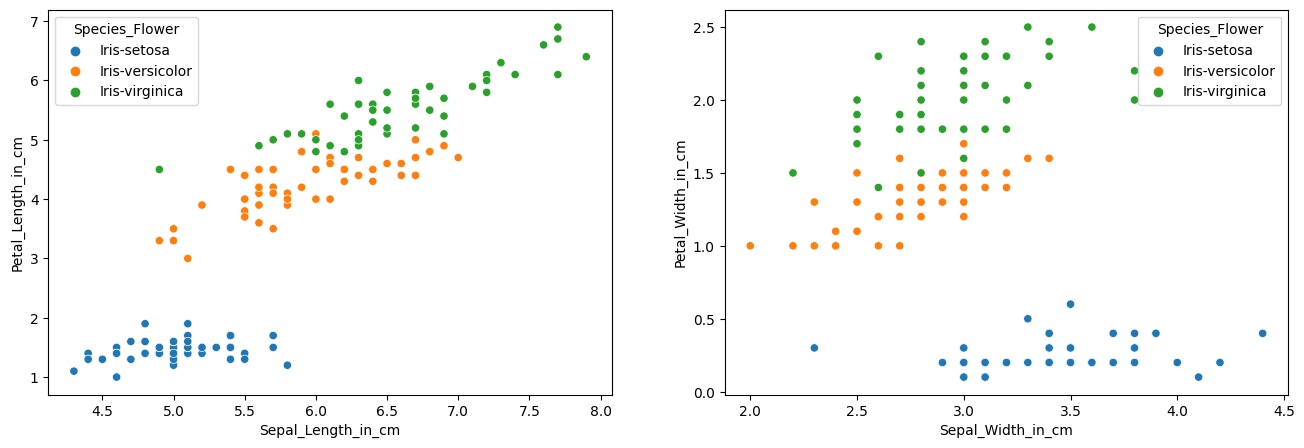

In [53]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=df,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=df,hue='Species_Flower',ax=ax2)

<Axes: ylabel='Petal_Width_in_cm'>

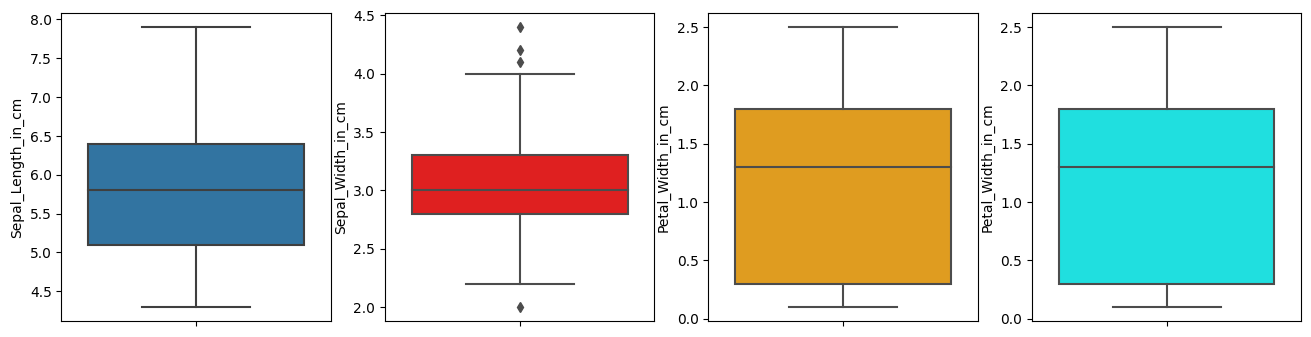

In [54]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='Sepal_Length_in_cm')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='Sepal_Width_in_cm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='cyan')

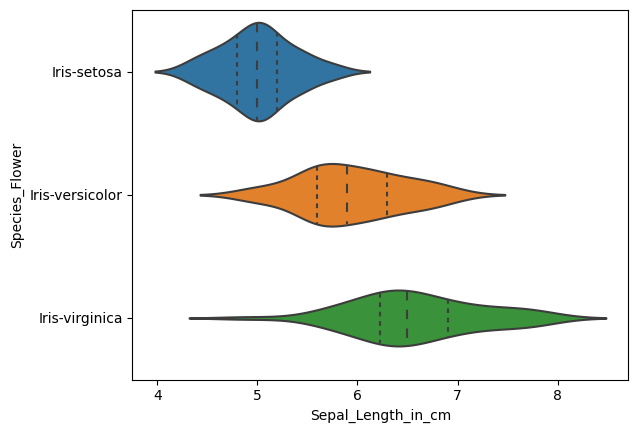

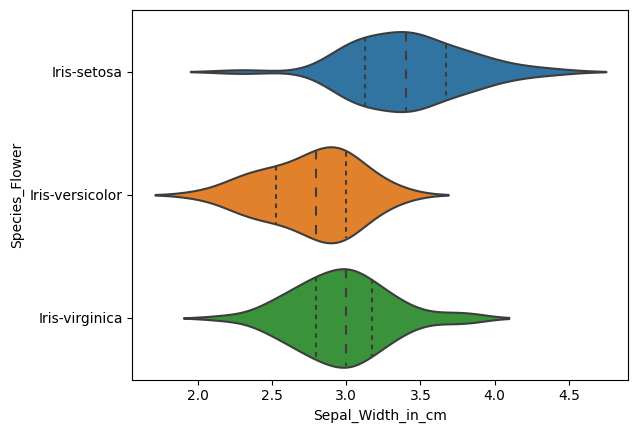

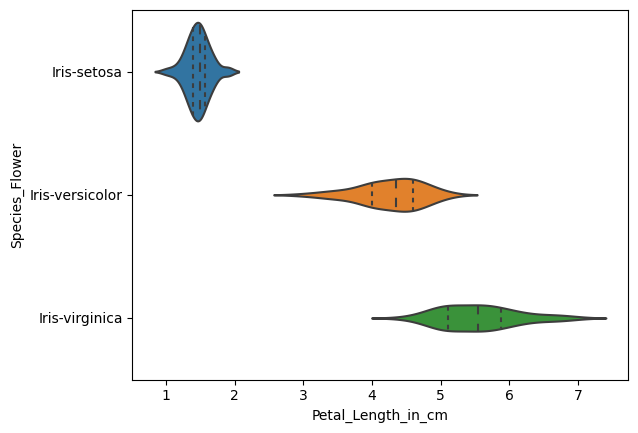

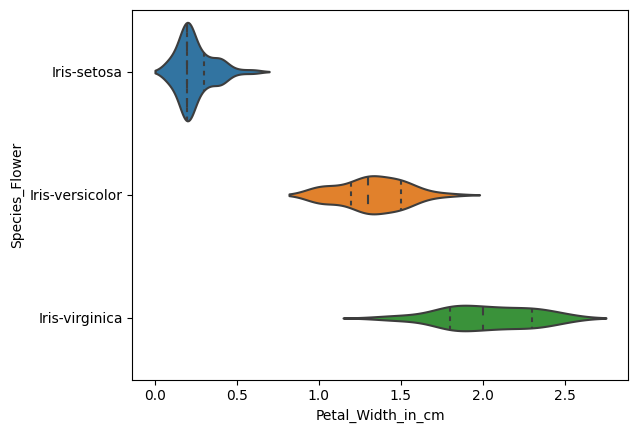

In [55]:
sns.violinplot(y='Species_Flower', x='Sepal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Sepal_Width_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Width_in_cm', data=df, inner='quartile')
plt.show()


<ipython-input-56-c06bbf75caf3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm')


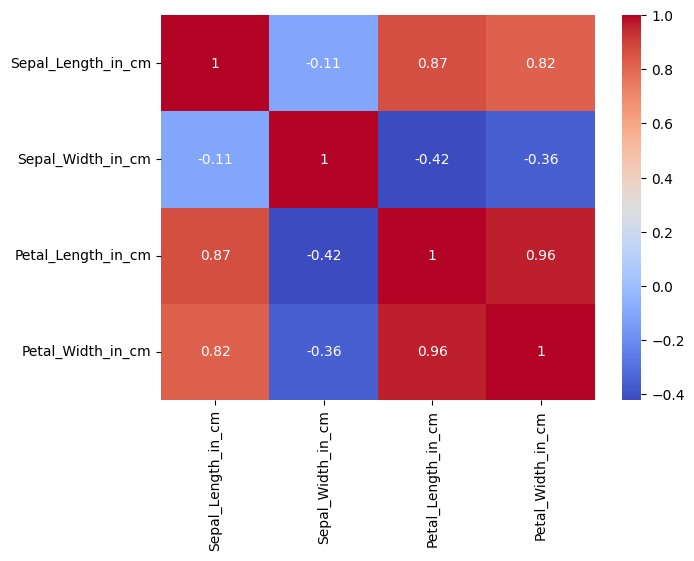

In [56]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

# Building Model , Training and Testing

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df['Species_Flower'] = le.fit_transform = (df['Species_Flower'])
df.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [59]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

# 1. Logistic Regression

In [60]:
# Initialize a Logistic Regression
lg= LogisticRegression(max_iter=1000)

In [61]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
# Predict on the test set and calculate accuracy
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)


In [63]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))

In [64]:
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score*100,2)}%')

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.89      1.00      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 95.56%


# 2. Linear SVC

In [27]:
# Initialize a Linear SVC
rbf_sv= SVC()
rbf_sv.fit(x_train,y_train)
L_svc=LinearSVC()

In [28]:
L_svc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [29]:
# Predict on the test set and calculate accuracy
y_pred=L_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [30]:
print('Linear SVC')
report(L_svc)
print(f'Accuracy: {round(score*100,2)}%')

Linear SVC
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 95.56%


# 3. Decision Tree Classifier

In [31]:
DTC = DecisionTreeClassifier()

In [32]:
DTC=DTC.fit(x_train,y_train)

In [33]:
# Predict on the test set and calculate accuracy
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [34]:
print('Decision Tree Classifier')
report(DTC)
print(f'Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 95.56%


# 4. Multinomial Naive Bayes

In [35]:
NB= MultinomialNB()

In [36]:
NB.fit(x_train,y_train)

MultinomialNB()

In [37]:
# Predict on the test set and calculate accuracy
y_pred=NB.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [38]:
print('NB')
report(NB)
print(f'Accuracy: {round(score*100,2)}%')

NB
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.53      1.00      0.69         9
 Iris-virginica       1.00      0.64      0.78        22

       accuracy                           0.82        45
      macro avg       0.84      0.88      0.82        45
   weighted avg       0.91      0.82      0.83        45

Accuracy: 82.22%
